In [29]:
import numpy as np
from dataclasses import asdict
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

from martignac.nomad.mini_entries import find_mini_queries_corresponding_to_workflow
from martignac.workflows.solute_in_bilayer_umbrella import project
from martignac.liquid_models.mixtures import LiquidMixture
from martignac.workflow_interfaces.utils import convert_multiple_entry_ids_to_specific_interfaces

In [39]:
df = pd.json_normalize([asdict(e) for e in find_mini_queries_corresponding_to_workflow(project, dataset_ids=["HJdEI1q4SV-c5Di43BTT_Q"])])
df = df.rename(
    columns={
        "comment.job_id": "job_id", 
        "comment.state_point.lipids": "lipids",
        "comment.state_point.depth_from_bilayer_core": "depth_from_bilayer_core",
        "comment.state_point.solute_name": "solute_name", 
        "comment.mdp_files": "mdp_files", 
        "comment.itp_files": "itp_files"
    }
)
df["lipids"] = df["lipids"].apply(lambda x: LiquidMixture.from_list_of_dicts(x).to_insane_format())
df = df.sort_values("depth_from_bilayer_core").groupby(by=["solute_name", "lipids"]).first()
df = df.drop(["workflow_name", "comment.workflow_name", "datasets", "comment.state_point.type", "depth_from_bilayer_core"], axis=1)
tuple_of_entry_ids = tuple(df["entry_id"].values)
interfaces = convert_multiple_entry_ids_to_specific_interfaces(tuple_of_entry_ids, use_prod=project.nomad_use_prod_database)
df["pmf"] = [i.get_wham_npy(use_bootstrap=False)[1] for i in interfaces]
df

24-08-23 10:39:02 - martignac.nomad.mini_entries - INFO - found 42 entries online for workflow SoluteInBilayerUmbrellaFlow


,,entry_id,upload_id,published,use_prod,job_id,mdp_files,itp_files,pmf
solute_name,lipids,,,,,,,,
P6,M3.POPC:10,gZ4IJY9bJtr-AtBIFk_U8EZwrB5Y,dIc1Bor8SEyTE-l4cNNrdQ,True,False,87f6a28debd38095868e09ca6c16f0e5,c007793be3151fc54f36966a50ac59d8,f75fb22561a042c4c3a3d0374cf88dd4,"[15.03452, 16.14615, 15.3148, 15.62377, 15.285..."


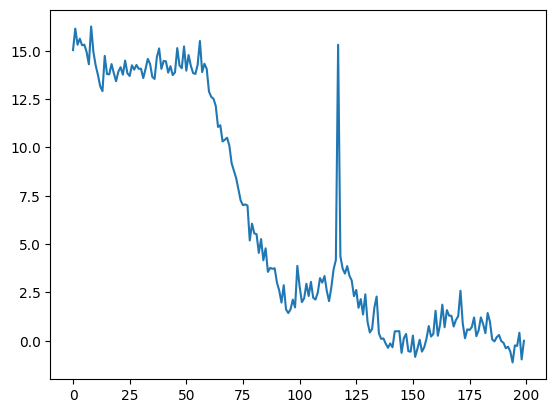

In [40]:
plt.plot(df.iloc[0]["pmf"])